In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head() # It gives me initial 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
# checking the missing values
df.isnull().sum()
#fillna

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Observation

There is no null values in our data

In [7]:
df.duplicated().sum() #adding the number of duplicates here.

0

# Observation

There are no duplicate values in our data 

In [8]:
# Checking count of customers who left and stayed

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Observation

In [9]:
# sns.countplot(data= df_categorical, x= 'Hascrcard',hue='Exited')   .... for countplot

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Observation 

Here we got to know that we have total 14 columns, out of this 1(Exited) will be our class label & rest 13 will be our feature.
So now we have to dividing these features into numerical & categorical.
RowNumber, CustomerId & Surname will be of no use for analysing this data.

In [11]:
df_numerical=df[['CreditScore','Age','Balance','EstimatedSalary','Exited']]
df_categorical=df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

In [12]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [13]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# EDA(Exploratory Data Analysis)

We gonna do two types of analysis

1. Univariate
2. Bivariate

# EDA for numerical features

In [14]:
df_numerical.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited'], dtype='object')

# Univariate Analysis

## 1. CreditScore

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

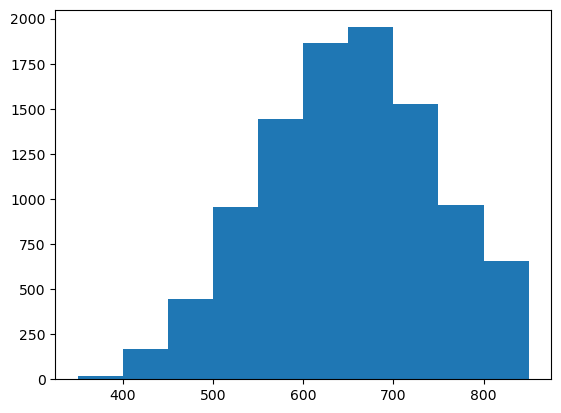

In [15]:
plt.hist(df_numerical['CreditScore'])

# Observation

Credit score histogram is giving us a hint to normal distributed curve, means most of the people
have credit score betweeen 600 to 700

There are less people which have credit score more than 800 and which have credit score less than
500

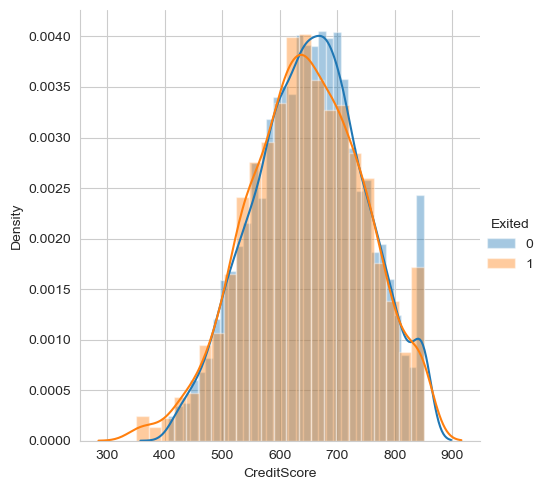

In [16]:
from warnings import filterwarnings
filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", height=5) \
   .map(sns.distplot, "CreditScore")\
   .add_legend();
plt.show();

# Observation

PDF of CreditScore is not helpful to differentiate between customers who stayed and left

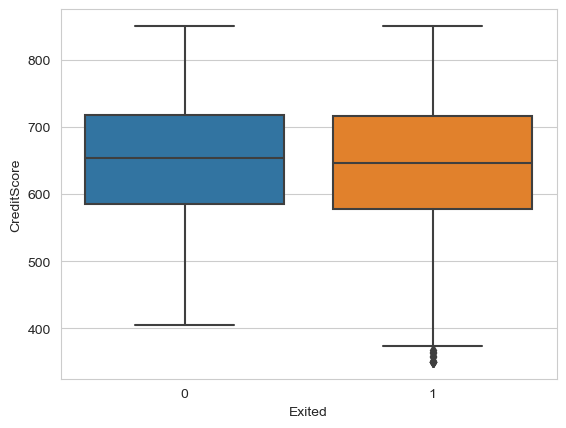

In [17]:
#box plot

sns.boxplot(x='Exited',y='CreditScore', data=df_numerical)
plt.show()

# Observation

As we can see there is not much difference in box plot of people who stayed and left, but we can say that :

>25% of customers have Credit score less than 580-570

>50% of customers have Credit Score less than 670-650

>75% of customers have Credit Score less than 720-710


As per whisker showing in the plot people who left have minimum CreditScore ( below 400 )

<function matplotlib.pyplot.show(close=None, block=None)>

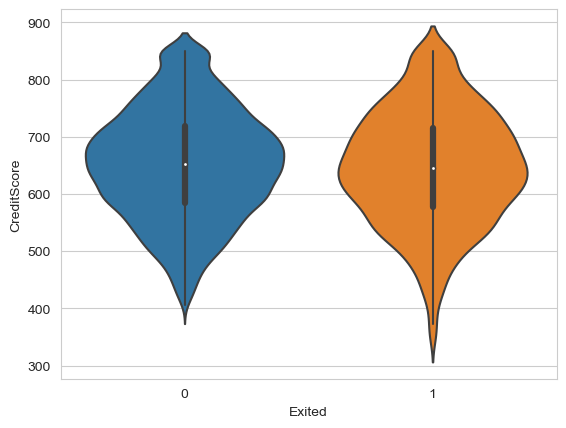

In [18]:
#violin plot
sns.violinplot(x='Exited',y='CreditScore',data=df_numerical)
plt.show

# Observation

Violin Plot is combination of Box Plot and PDF.

Here violin plot is not helping in analysing data.

# 2. Age

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

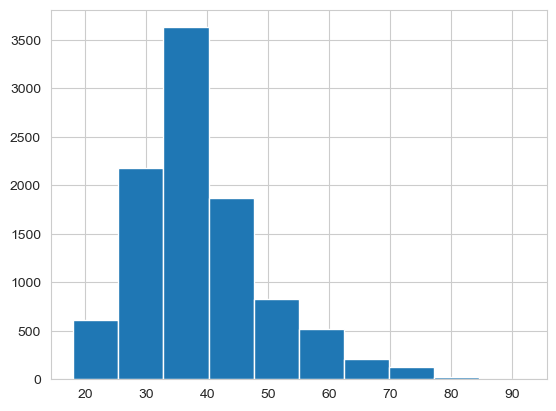

In [19]:
plt.hist(df_numerical['Age'])

# Observation

Age histogram is giving us hint that distribution is <b>Right skewed distrubation curve.</b>

By observing this plot we can say that most of the customers have Age between 30-40

There are very less customers above age of 50

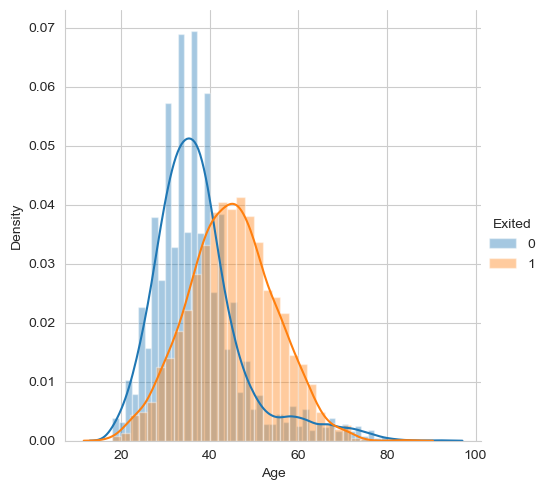

In [20]:
from warnings import filterwarnings
filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", height=5) \
   .map(sns.distplot, "Age")\
   .add_legend();
plt.show()

# Observation

PDF of Age is showing us that customers between age group of 30 to 40 are tend to stay.

Between age of 40 to 50 there are high chances of customers have left.

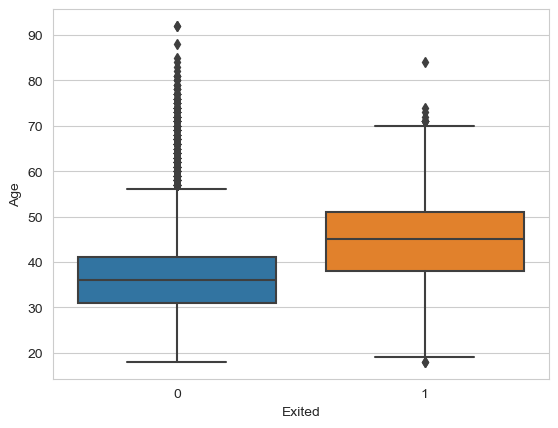

In [21]:
#box plot

sns.boxplot(x='Exited',y='Age', data=df_numerical)
plt.show()

# Observation

As we can see <b>IQR</b> of Customers who stayed and who left are overplapping around age range between 37 to 42

<function matplotlib.pyplot.show(close=None, block=None)>

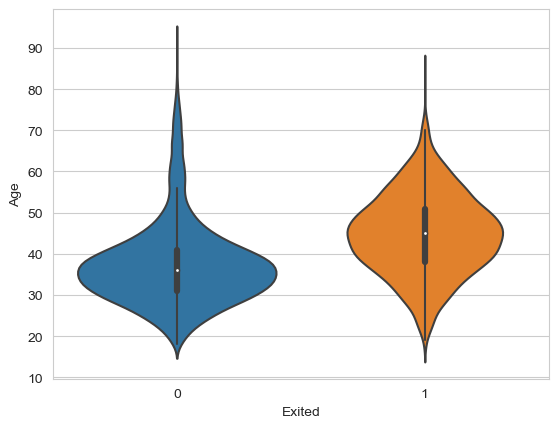

In [22]:
#violin plot
sns.violinplot(x='Exited',y='Age',data=df_numerical)
plt.show

# Observation

Violin Plot is combination of Box Plot and PDF.

Here violin plot is not helping in analysing data.

# 3. Balance

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

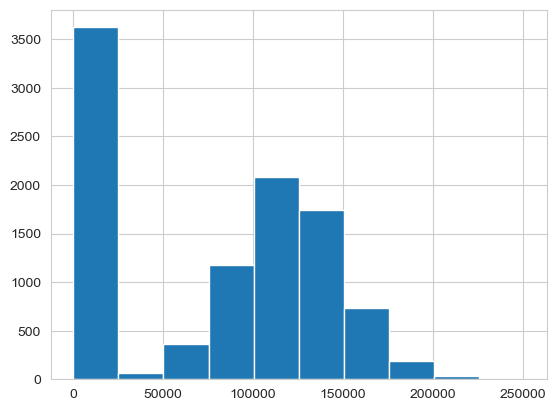

In [23]:
plt.hist(df_numerical['Balance'])

# Observation

As we can see in histogram of Balance that above 3500 customers have balance nearly zero in their bank account.


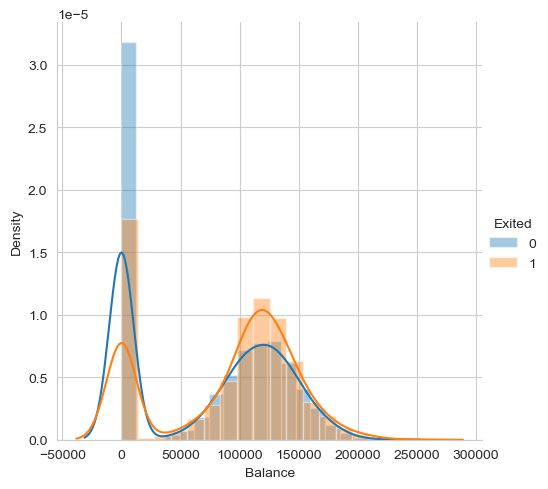

In [24]:
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('whitegrid')
sns.FacetGrid(df_numerical,hue='Exited',height=5) \
   .map(sns.distplot,'Balance')  \
   .add_legend()
plt.show()

# Observation

Majority of the customers have balance zero in their bank account.

Although they have zero balance but majority of them have stayed with the bank.

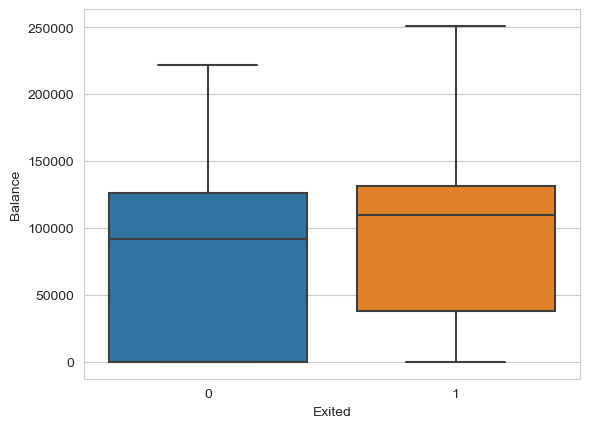

In [25]:
sns.boxplot(x='Exited',y='Balance',data=df_numerical)
plt.show()

# Observation

Here we can see that customer who have Balance less than 50000 are likely to stay with the bank.

#  Percentile

In [26]:
print(np.percentile(df_numerical['Balance'],36))

print(np.percentile(df_numerical['Balance'],37))

0.0
51854.097800000025


# Observation

After checking with percentiles we came to the conclusion :

36% out of total customers have Balance = 0.00

# 4. Estimated Salary

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

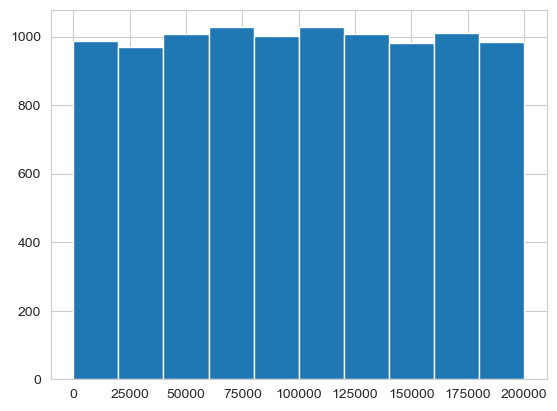

In [27]:
plt.hist(df_numerical['EstimatedSalary'])

# Observation

We can see from this plot that there is not much difference between no. of customers in different salary range.

this plot is not much helping us to get to analyse the data.

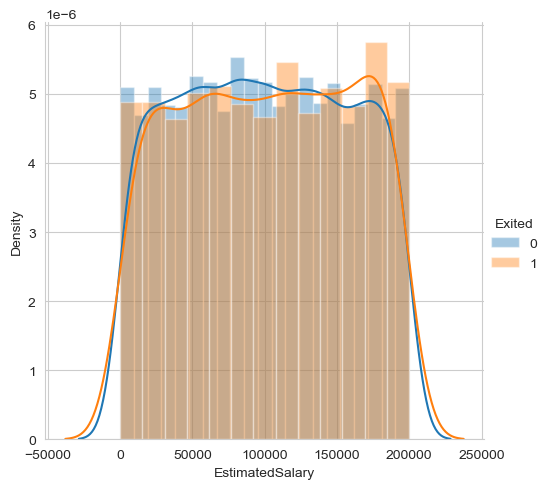

In [28]:
#PDF
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", height=5) \
   .map(sns.distplot, "EstimatedSalary")\
   .add_legend();
plt.show();

# Observation

PDF is also not much useful plot to analyse the data

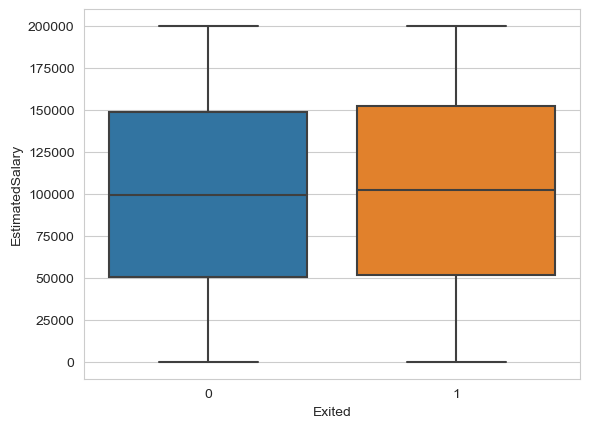

In [29]:
#box plot

sns.boxplot(x='Exited',y='EstimatedSalary', data=df_numerical)
plt.show()

# Observation

Here box plot is not helping in analysing data.

# Bi-Variate Analysis

We will begin with Pair Plot to observe what is happening inside our numerical features.

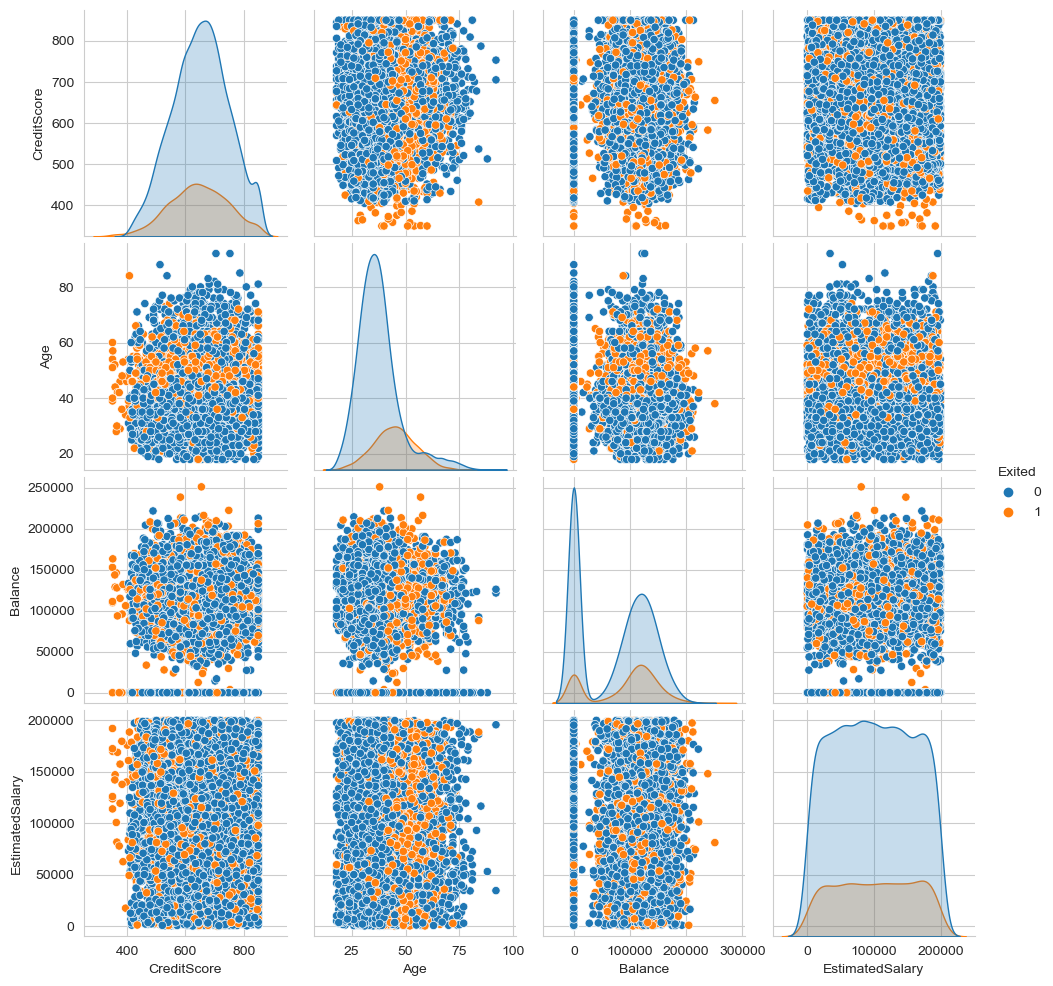

In [30]:
sns.pairplot(df_numerical,hue='Exited')

# Observation

1. We can see some pattern forming between Age & CreditScore

2. We can see some pattern forming between Age & EstimatedSalary

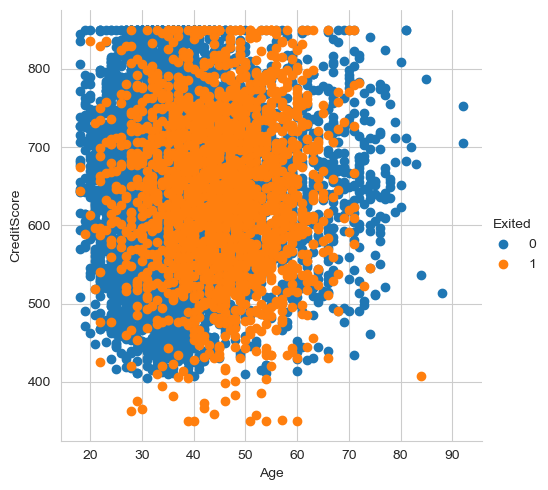

In [31]:
# LETS PLOT CREDIT SCORE AND AGE

import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", height=5) \
   .map(plt.scatter, "Age","CreditScore")\
   .add_legend();
plt.show();

# Observation

we can see that there is a circular region in approximately centre of the plot which has majority of the customers who have left the bank.


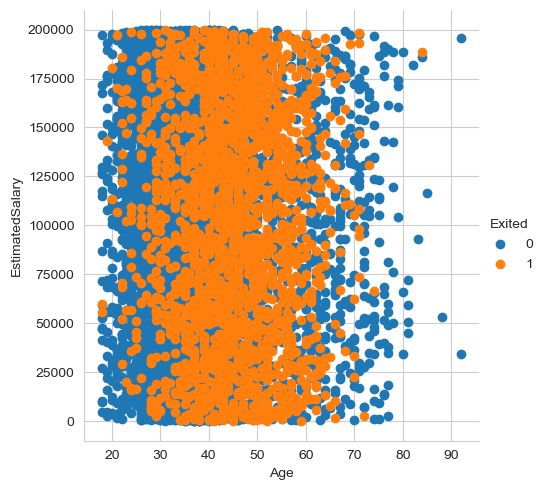

In [32]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", height=5) \
   .map(plt.scatter, "Age","EstimatedSalary")\
   .add_legend();
plt.show();

# Observation

we can see the formation of a pattern in between age group 30 to 60 which tells us that, below age 30 and above age 60 customers
are more likely to stay.

# Scaling of numerical features

Now we will do scaling of the numerical features to <b>normalise<b/> the features.

In [33]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
CS= scaling.fit_transform(df_numerical[['CreditScore']])
age = scaling.fit_transform(df_numerical[['Age']])
Balance= scaling.fit_transform(df_numerical[['Balance']])

ES=scaling.fit_transform(df_numerical[['EstimatedSalary']])

df_numerical['CreditScore'] = CS

df_numerical['Age'] = age

df_numerical['Balance'] = Balance

df_numerical['EstimatedSalary'] = ES


In [35]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


# Observation:
we can see that we have naemalised all the feature values. and they all are now in same scale between 0 to 1.

we have used <b>Minmax scaler</b> here to normalise the values.

# Categorical feartures

In [36]:
df_categorical.columns

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [37]:
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# One Hot Encoding

In [38]:
categorical = ['Geography','Gender']
df_categorical = pd.get_dummies(df_categorical, columns=categorical, drop_first=False)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,1,1,0
2,8,3,1,0,1,1,0,0,1,0
3,1,2,0,0,0,1,0,0,1,0
4,2,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,0,0,1
9996,10,1,1,1,0,1,0,0,0,1
9997,7,1,0,1,1,1,0,0,1,0
9998,3,2,1,0,1,0,1,0,0,1


# Observation
 In one hot encoding we are converting the categorical data into numeric data to help understand the data properly to the machine.


By one hot encoding our number of features have increased and that will make our data of too many dimensions.

And to minimise the number of columns(features) we Adjusted the data in a way that , where Male and female were 2 columns we diducted into 1 (Gender_male). which tales us the customer is male or not that will ultimately tell you that if customer is not male then she's female.

# Tenure

In [39]:
import warnings
warnings.filterwarnings("ignore")
b=df_categorical['Tenure'].value_counts()
b

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

# Observation
Here we can see that there are 11 different tenures in our data from 0 to 10 years.

<Axes: >

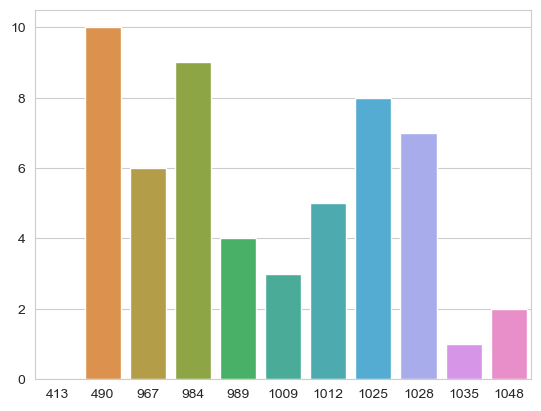

In [40]:
sns.barplot(x=b.values,y=b.index)

# Observation
from the graph we can see that most of the customers have tenure 2 years and very less number of customes have tenure for 10 years.

(-1.0999999247712648,
 1.0999999964176792,
 -1.0999999394567592,
 1.099999963766278)

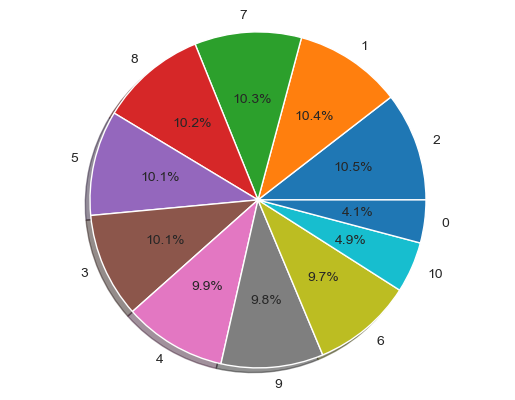

In [41]:
labels = b.index
sizes =b.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation
as we can see from pie chart only 4.9% of the customers are having tenure of 10 years. and only 4.1% of customers have tenure of 0 years.

# Number of Products

In [42]:
a=df_categorical['NumOfProducts'].value_counts()
a

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

# Observation
Number of customers id decreasing as the number of products is increasing.

<Axes: >

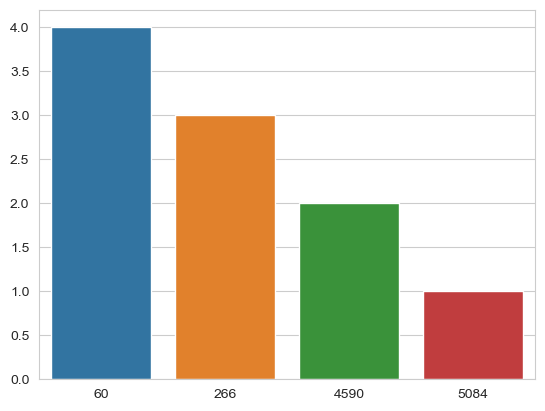

In [43]:
sns.barplot(x=a.values,y=a.index)

# Observation
Maximum number of customers have bought just one product.

# Has Credit Card

In [44]:
a=df_categorical['HasCrCard'].value_counts()
a

1    7055
0    2945
Name: HasCrCard, dtype: int64

# Observation

1 is customers who does not have credit card.

0 is customers who have credit card.

<Axes: >

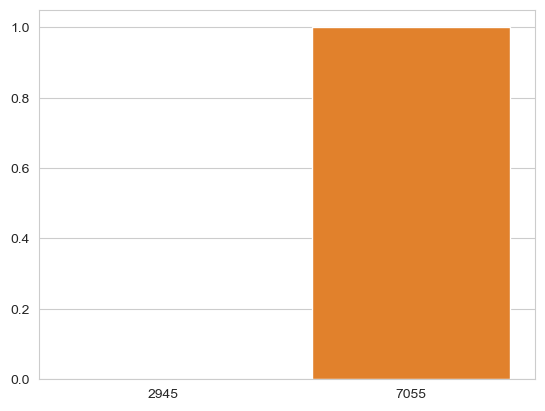

In [45]:
sns.barplot(x=a.values,y=a.index)

# Observation
Here graph is showing us that 2945 customers do have credit card and 7055 dont.

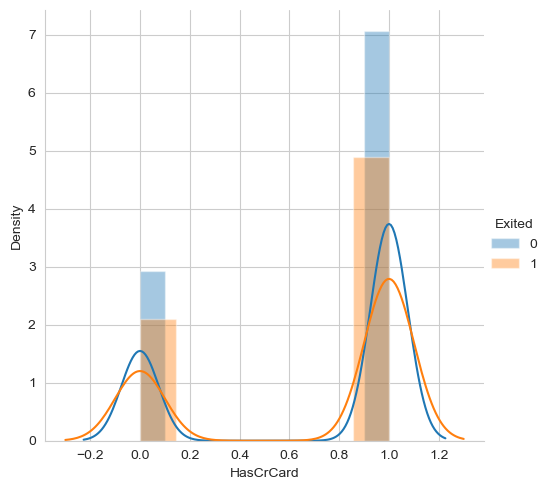

In [46]:
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", height=5) \
   .map(sns.distplot, "HasCrCard")\
   .add_legend();
plt.show();

# Observation
PDF is not giving us much information to analyse data.

(-1.0999974122162546,
 1.0999998767722026,
 -1.0999988648570669,
 1.0999993247775581)

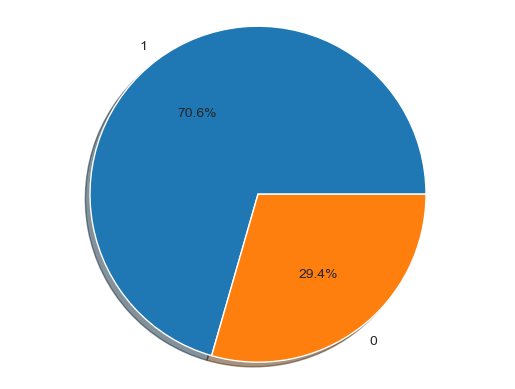

In [47]:
labels = a.index
sizes =a.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')

# Observation
here we can see from pie chart that 70.6% of the customers does not have credit card.

29.4% customers have credit card.

# Mean , Median and Percentile

In [48]:
stayed = df[df['Exited']==0]#I want all the people in one data frame who have stayed

left = df[df['Exited']==1]# i want all the people in one data frame who have left.

In [49]:
stayed

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [50]:
left

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


# Observation
Here we have saperated rows of customers who have <b>left</b> and stayed

# Credit Score

In [51]:
# Mean
print ("Mean :")
print((np.mean(stayed['CreditScore'])),"for customers who stayed")
print((np.mean(left['CreditScore'])),"for customers who left")

Mean :
651.8531960316463 for customers who stayed
645.3514972999509 for customers who left


In [52]:
# Median
print ("Median :")
print((np.median(stayed['CreditScore'])),"for customers who stayed")
print((np.median(left['CreditScore'])),"for customers who left")

Median :
653.0 for customers who stayed
646.0 for customers who left


In [53]:
# Standard Deviation
print ("Standard Deviation :")
print((np.std(stayed['CreditScore'])),"for customers who stayed")
print((np.std(left['CreditScore'])),"for customers who left")

Standard Deviation :
95.64783071535247 for customers who stayed
100.29687481012597 for customers who left


# Age

In [54]:
# Mean
print ("Mean :")
print((np.mean(stayed['Age'])),"for customers who stayed")
print((np.mean(left['Age'])),"for customers who left")

Mean :
37.40838879819164 for customers who stayed
44.8379970544919 for customers who left


In [55]:
# Median
print ("Median :")
print((np.median(stayed['Age'])),"for customers who stayed")
print((np.median(left['Age'])),"for customers who left")

Median :
36.0 for customers who stayed
45.0 for customers who left


In [56]:
# Standard Deviation
print ("Standard Deviation :")
print((np.std(stayed['Age'])),"for customers who stayed")
print((np.std(left['Age'])),"for customers who left")

Standard Deviation :
10.124727115441777 for customers who stayed
9.759165198147958 for customers who left


# Balance

In [57]:
# Mean
print ("Mean :")
print((np.mean(stayed['Balance'])),"for customers who stayed")
print((np.mean(left['Balance'])),"for customers who left")

Mean :
72745.2967788522 for customers who stayed
91108.53933726068 for customers who left


In [58]:
# Meadian
print ("Median :")
print((np.median(stayed['Balance'])),"for customers who stayed")
print((np.median(left['Balance'])),"for customers who left")

Median :
92072.68 for customers who stayed
109349.29 for customers who left


# Observation
Here we can see that there is noticeable difference between mean and median of Balance. It shows that there are some outliers.

In [59]:
# Standard Deviation
print ("Standard Deviation :")
print((np.std(stayed['Balance'])),"for customers who stayed")
print((np.std(left['Balance'])),"for customers who left")

Standard Deviation :
62844.094322747915 for customers who stayed
58346.467874478956 for customers who left


# Estimated Salary

In [60]:
# Mean
print ("Mean :")
print((np.mean(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.mean(left['EstimatedSalary'])),"for customers who left")

Mean :
99738.39177194524 for customers who stayed
101465.67753068237 for customers who left


In [61]:
# Meadian
print ("Median :")
print((np.median(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.median(left['EstimatedSalary'])),"for customers who left")

Median :
99645.04 for customers who stayed
102460.84 for customers who left


In [62]:
# Standard Deviation
print ("Standard Deviation :")
print((np.std(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.std(left['EstimatedSalary'])),"for customers who left")

Standard Deviation :
57401.982332801934 for customers who stayed
57898.201201044954 for customers who left


In [63]:
# steps to do

#1. joining my numerical and categorical features
#2. train, cv,test
#3. individual algorithm
#4. testing of the performance
#5. Conclusion


In [64]:
#joining

df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


In [65]:
df_categorical
df_categorical2=df_categorical.drop("Exited",axis=1)
# removing the exited column to get rid of duplicate columns

In [66]:
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,1,1,0
2,8,3,1,0,1,1,0,0,1,0
3,1,2,0,0,0,1,0,0,1,0
4,2,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,0,0,1
9996,10,1,1,1,0,1,0,0,0,1
9997,7,1,0,1,1,1,0,0,1,0
9998,3,2,1,0,1,0,1,0,0,1


In [67]:
df_concat2 = pd.concat([df_categorical2,df_numerical], axis=1)
#axis=1 means we are joining 2 dataframes horizontally...
df_concat2

#concatinating 2 dataframes

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735,1
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709,0
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654,1
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120,0
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390,1
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429,1


In [68]:
X=df_concat2.iloc[:,0:13]
#sepearting features from classlabels

In [69]:
X

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429


In [70]:
Y=df_concat2.iloc[:,13:]

In [71]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [77]:
#train test split
#spliting the data into train and test
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [73]:
X_train.shape

(8000, 13)

In [74]:
y_train.shape

(8000, 1)

In [75]:
X_test.shape

(2000, 13)

In [76]:
y_test.shape

(2000, 1)

# Modelling

# KNN(K NEAREST NEIGHBOUR)

We will apply knn to our data and then check its performance

In [78]:
#applying knn

# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier

hyper_parameter_k=[{'n_neighbors':[3,5,7,9]}]
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print("training accuracy is",modelknn.score(X_train,y_train))
print("testing accuracy is ",modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=7)
training accuracy is 0.847625
testing accuracy is  0.8165


In [79]:
knn_test_prediction=modelknn.predict(X_test)    # This is your y_pred_test
knn_train_prediction=modelknn.predict(X_train)  # y_pred_train

In [80]:
# evalution
from sklearn.metrics import f1_score
X_knntest_F1score=f1_score(y_test,knn_test_prediction)
print("Testing f1 score is=",X_knntest_F1score)  # f1 score on test data

X_knntrain_F1score=f1_score(y_train,knn_train_prediction)
print("Training f1 score is=",X_knntrain_F1score)

Testing f1 score is= 0.34111310592459604
Training f1 score is= 0.5098512263771612


In [81]:
# Confusion matrix
# Testing confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf=confusion_matrix(y_test,knn_test_prediction)
print(x_knn_cf)

[[1538   69]
 [ 298   95]]


Test confusion matrix


<Axes: >

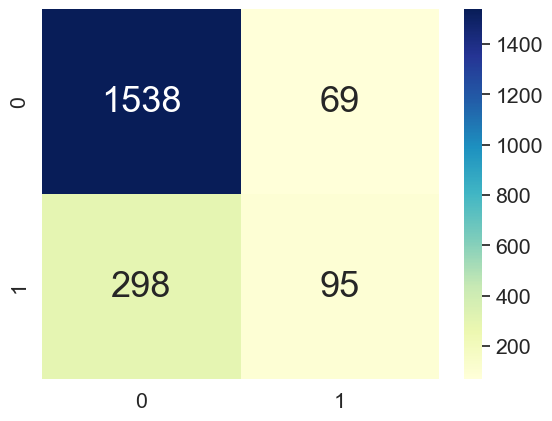

In [82]:
print('Test confusion matrix')
sns.set(font_scale=1.4) # for label size
sns.heatmap(x_knn_cf,annot=True,annot_kws={'size':26}, fmt='g',cmap="YlGnBu")

In [83]:
# Confusion matrix
# Training confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf_train=confusion_matrix(y_train,knn_train_prediction)
print(x_knn_cf)

[[1538   69]
 [ 298   95]]


Train confusion matrix


<Axes: >

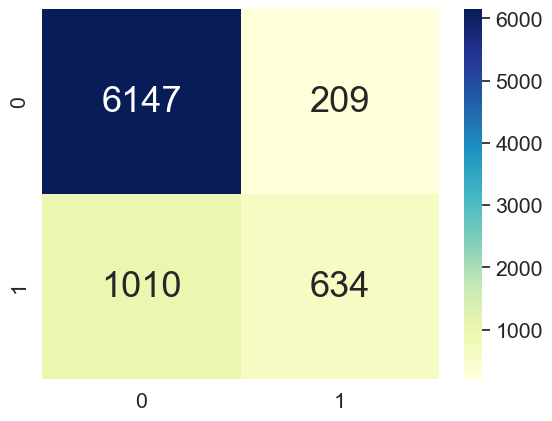

In [84]:
print('Train confusion matrix')
sns.set(font_scale=1.4) # for label size
sns.heatmap(x_knn_cf_train,annot=True,annot_kws={'size':26}, fmt='g',cmap="YlGnBu")

In [85]:
# Precision
# Training data
from sklearn.metrics import precision_score
x_knn_p=precision_score(y_train,knn_train_prediction)
print("The precision of x_knn_p for training data=",x_knn_p)

The precision of x_knn_p for training data= 0.7520759193357058


In [86]:
# Precision
# Testing data
from sklearn.metrics import precision_score
x_knn_p_test=precision_score(y_test,knn_test_prediction)
print("The precision of x_knn_p_test for testing data=",x_knn_p_test)

The precision of x_knn_p_test for testing data= 0.5792682926829268


In [87]:
# Recall
# Test data
from sklearn.metrics import recall_score
x_knn_r_test=recall_score(y_test,knn_test_prediction)
print('The recall of test data for knn is=',x_knn_r_test)

The recall of test data for knn is= 0.24173027989821882


In [88]:
# Recall
# Training data
from sklearn.metrics import recall_score
x_knn_r_train=recall_score(y_train,knn_train_prediction)
print('The recall of training data for knn is=',x_knn_r_train)

The recall of training data for knn is= 0.38564476885644766


In [89]:
# Accuracy

from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,knn_train_prediction)
print('Training accuracy is=',a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,knn_test_prediction)
print('Training accuracy is=',b)

Training accuracy is= 0.847625
Training accuracy is= 0.8165


# Logistic Regression

In [90]:
#we are using simple gridsearchcv to tune the hyperparameter C
#here we are not using smote samples

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

LRmodel=GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),tuned_parameters)

LRmodel.fit(X_train,y_train)

print(LRmodel.best_estimator_)
print(LRmodel.score(X_test,y_test))
print(LRmodel.score(X_train,y_train))

#this is accuracy

LogisticRegression(C=100, class_weight='balanced', max_iter=400)
0.7195
0.70775


# Decision Tree

In [91]:
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6]}]

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=42)


model=GridSearchCV(clf,tuned_parameters)

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)
0.8595
0.865875


# Random Forest

In [92]:
#Training random forest after applying SMOTE technique.
#here we are using GridSearchCV to tune the hyperparamters we have in randomforest to see which
# parameters works best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc=RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1)

In [93]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'n_estimators': 500}


In [94]:
#training the random forest model
rfc_new=RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,y_train)

In [95]:
#predictions
rf_predictions_test=random_forest_model.predict(X_test)
rf_predictions_train=random_forest_model.predict(X_train)

In [96]:
#evaluation of random forest with smote
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,rf_predictions_test)
print("Testing f1 score is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,rf_predictions_train)
print("Training f1 score is",X_train_F1score) #f1 score on train data

Testing f1 score is 0.4686346863468635
Training f1 score is 0.515032679738562


In [97]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_rf_train=confusion_matrix(y_train,rf_predictions_train)
print(x_rf_train)

[[6296   60]
 [1053  591]]


In [98]:
from sklearn.metrics import confusion_matrix
x_rf_test=confusion_matrix(y_test,rf_predictions_test)
print(x_rf_test)

[[1585   22]
 [ 266  127]]


In [101]:
from prettytable import PrettyTable
columns=(["ALGORITHM", "ACCURACY","F1","PRECISION","RECALL"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","SVM", "DECISION TREE" ,"Random Forest"])
myTable.add_column(columns[1], [" 48%"," 73.5%","71.61%", "87%", "51.2%"])
myTable.add_column(columns[2], ["28.6% ","23.5%","55.7%", "78.5%","51%"])
myTable.add_column(columns[3], ["28.6% ","23.5%","55.7%", "78.5%","51%"])
myTable.add_column(columns[4], ["28.6% ","23.5%","55.7%", "78.5%","51%"])



print(myTable)

+---------------------+----------+--------+-----------+--------+
|      ALGORITHM      | ACCURACY |   F1   | PRECISION | RECALL |
+---------------------+----------+--------+-----------+--------+
|         KNN         |    48%   | 28.6%  |   28.6%   | 28.6%  |
| Logistic Regression |   73.5%  | 23.5%  |   23.5%   | 23.5%  |
|         SVM         |  71.61%  | 55.7%  |   55.7%   | 55.7%  |
|    DECISION TREE    |   87%    | 78.5%  |   78.5%   | 78.5%  |
|    Random Forest    |  51.2%   |  51%   |    51%    |  51%   |
+---------------------+----------+--------+-----------+--------+
